In [1]:
import cv2
import matplotlib.pyplot as plt

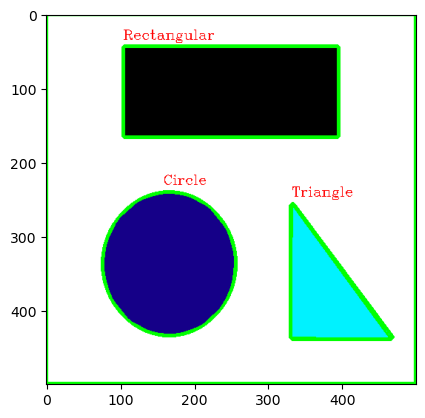

In [11]:
img = cv2.imread("multiple.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)

coutours, heirarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, coutours, -1, (0,255,0), 3)

for contour in coutours:
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour,True), True)

    contour = len(approx)

    if contour == 3:
        shape_name = "Triangle"

    elif contour == 4:
        shape_name = "Rectangular"

    elif contour == 5 or contour == 6:
        shape_name = "Pentagon"

    elif contour > 6:
        shape_name = "Circle"

    else: 
        shape_name = "Unknown"

    cv2.drawContours(img, [approx], 0, (0,255,0), 2)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 10
    cv2.putText(img, shape_name, (x,y), cv2.FONT_HERSHEY_COMPLEX, 0.6, (255,0,0))

plt.imshow(img, cmap='gray')